## </>
<div style="font-family: 'Georgia', serif; border-left: 3px solid #ccc; padding-left: 12px; margin-bottom: 1em;">
<h2 style="margin: 0; color: #EF8C00; font-size: 2.4em; padding-left: 0; text-indent: 0;">
    Getting Started
</h2>
<p style="margin: 4px 0 0; color: #777; font-size: 1em;">
    Axes, Signals and APIs.
</p>
</div>

For any physical signal, we need to have an axis associated with it that has some physical meaning as opposed to index of an array. \
So we provide are two axis classes.
- `SAx` (Signal Axis): Can be uniform or non-uniform.
- `TAx` (Time Axis): Can only be uniform with a well defined sampling rate. It is a subclass of `SAx`.

For all the users who are working with **Time Domain Signal**, you should start from `TAx`.

### How to create an axis?
For all the modusa `model` classes like `SAx` and `TAx`, we have generators that let users create objects of these model classes with a higher level APIs. Creating objects using generators assure initial checks in place. We highly discourage instantiating any of the model classes without generators.

#### SAx/TAx Generator

axis([1, 2, 3, 3, 2, 1]) <class 'modusa.models.s_ax.SAx'>


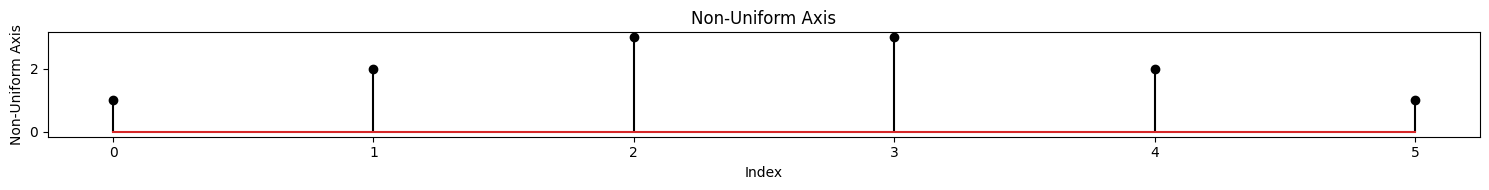

axis([ 0.,  1.,  2., ..., 97., 98., 99.]) <class 'modusa.models.s_ax.SAx'>


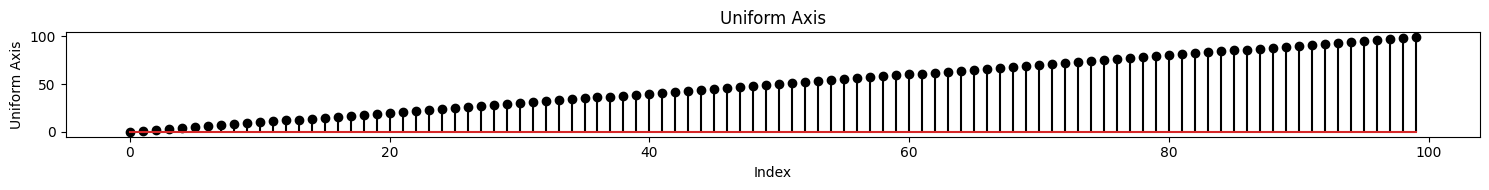

In [1]:
import modusa as ms
x = ms.sax.from_array([1, 2, 3, 3, 2, 1], label="Non-Uniform Axis")
print(x, type(x))
display(x.plot(show_stem=True))

# `linear` API
x = ms.sax.linear(100, label="Uniform Axis")
print(x, type(x))
display(x.plot(show_stem=True))

### How to create a signal from an axis?
Any mathematical operation on the axis should ideally result in a `ModusaSignal` object. The type of `ModusaSignal` we get depends on the axis type.
1. `SAx` Axis -> `S1D` Signal
2. `TAx` Axis -> `TDS` Signal

Note: You can also create signal directly using `ms.s1d` or `ms.tds` APIs.

signal([  0.,   2., ..., 196., 198.]) <class 'modusa.models.s1d.S1D'>
--------------------------------------------------
Title: Signal 1D
--------------------------------------------------
Type                : S1D
Shape               : (100,)
Inheritance         : ABC → ModusaSignal → S1D


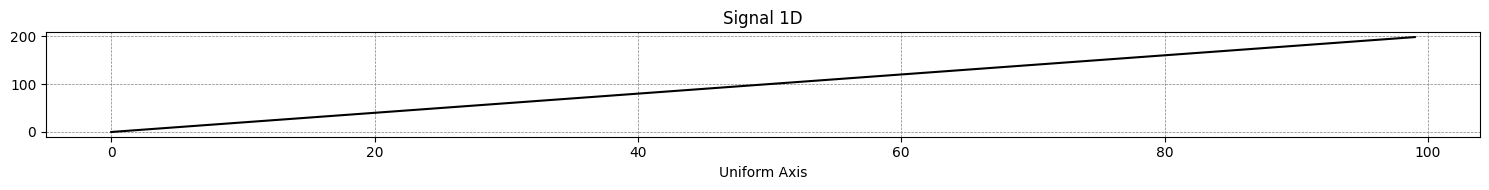

--------------------------------------------------
Title: Signal 1D
--------------------------------------------------
Type                : S1D
Shape               : (100,)
Inheritance         : ABC → ModusaSignal → S1D
signal([ 0.        ,  0.84147098, ..., -0.57338187, -0.99920683]) <class 'modusa.models.s1d.S1D'>


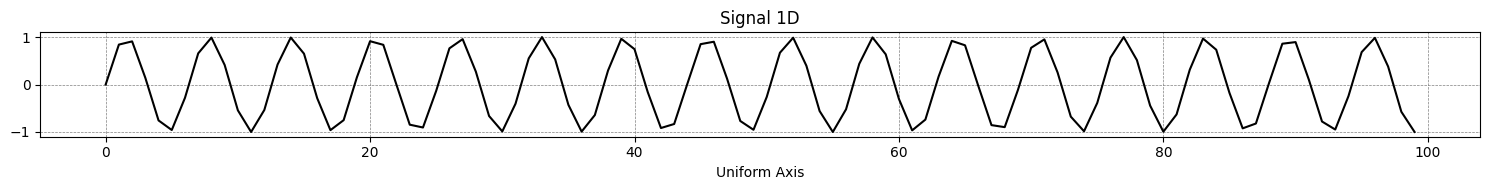

In [34]:
# SAx - S1D
x = ms.sax.linear(100, label="Uniform Axis")

y = 2 * x
print(y, type(y))
y.print_info()
display(y.plot())

import numpy as np
y = np.sin(x)
y.print_info()
print(y, type(y))
display(y.plot())

--------------------------------------------------
Title: Time Domain Signal
--------------------------------------------------
Type                : TDS
Shape               : (100,)
Duration            : 9.90 sec
Sampling Rate       : 10.0 Hz
Sampling Period     : 100.00 ms
Inheritance         : ABC → ModusaSignal → S1D → TDS
signal([ 0. ,  0.2, ..., 19.6, 19.8]) <class 'modusa.models.tds.TDS'>


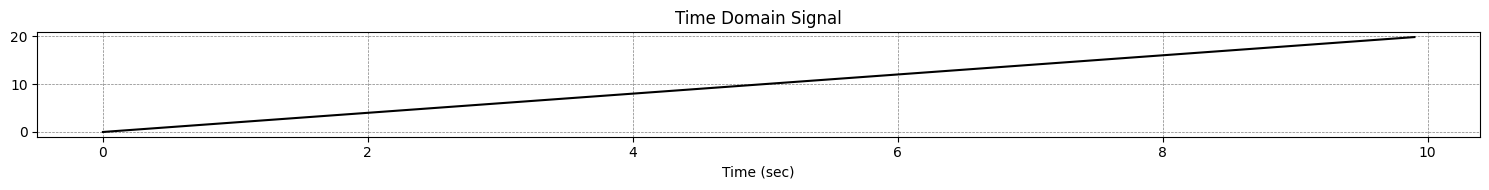

--------------------------------------------------
Title: Time Domain Signal
--------------------------------------------------
Type                : TDS
Shape               : (100,)
Duration            : 9.90 sec
Sampling Rate       : 10.0 Hz
Sampling Period     : 100.00 ms
Inheritance         : ABC → ModusaSignal → S1D → TDS
signal([ 0.        ,  0.09983342, ..., -0.36647913, -0.45753589]) <class 'modusa.models.tds.TDS'>


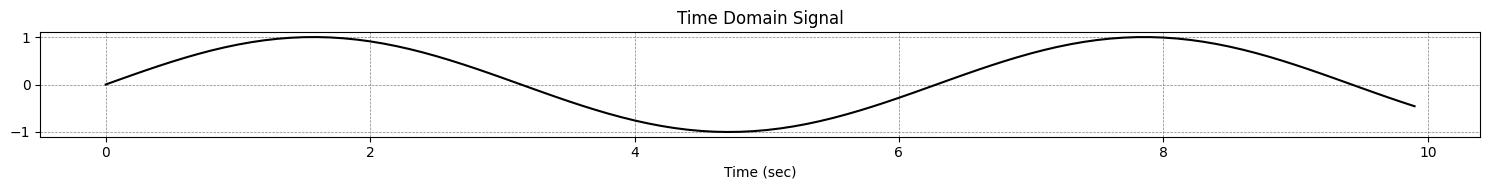

In [11]:
# TAx - TDS
t = ms.tax.linear(100, sr=10, label="Time (sec)")

y = 2 * t
y.print_info()
print(y, type(y))
display(y.plot())

import numpy as np
y.print_info()
y = np.sin(t)
print(y, type(y))
display(y.plot())

### How to set meta info
- Every `ModusaAxis` and `ModusaSignal` subclasses should have a `set_meta_info` method.
- This should help you attach title and labels to the signal and axis.

--------------------------------------------------
Title: Sinusoid
--------------------------------------------------
Type                : TDS
Shape               : (100,)
Duration            : 9.90 sec
Sampling Rate       : 10.0 Hz
Sampling Period     : 100.00 ms
Inheritance         : ABC → ModusaSignal → S1D → TDS
signal([ 0.        ,  0.09983342, ..., -0.36647913, -0.45753589]) <class 'modusa.models.tds.TDS'>


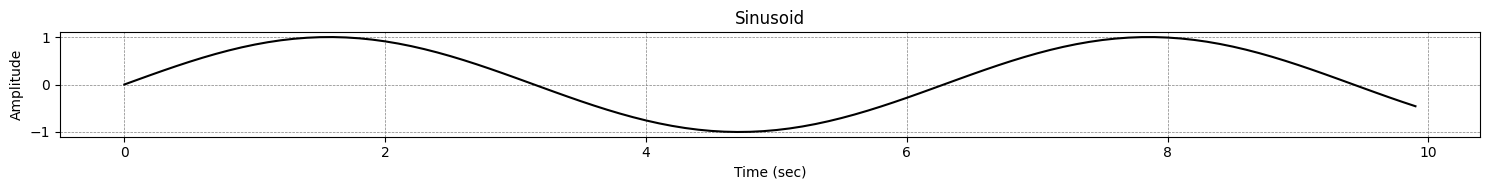

In [10]:
t = ms.tax.linear(100, sr=10, label="Time (sec)")
y = (np.sin(t)).set_meta_info("Sinusoid", "Amplitude")
y.print_info()
print(y, type(y))
display(y.plot())

### How to work with `ModusaSignal` objects
- Ideally, all the operations that you can do on `np.ndarray` should work on `ModusaSignal` object with these operations now being axis aware. However, we request you to validate and report any unexpected behavior.
- Feel free to try performing different operations. I am sharing some of them below.

In [17]:
# Generating a signal
t = ms.tax.linear(100, sr=10, label="Time (sec)")
y1 = (np.sin(t)).set_meta_info("$Sine$", "Amplitude")
y2 = (np.cos(t)).set_meta_info("$Cosine$", "Amplitude")
y_sum = (y1 + y2).set_meta_info("$Sine + Cosine$", "Amplitude")
y_square_sum = (y1 ** 2 + y2 ** 2).set_meta_info("$Sine^2 + Cosine^2$", "Amplitude")

### How to plot multiple modusa signals with x or t axis aligned.
- Very often, we need to plot multiple signals with typically their time/x axis aligned.
- `ms.plot` does the same.

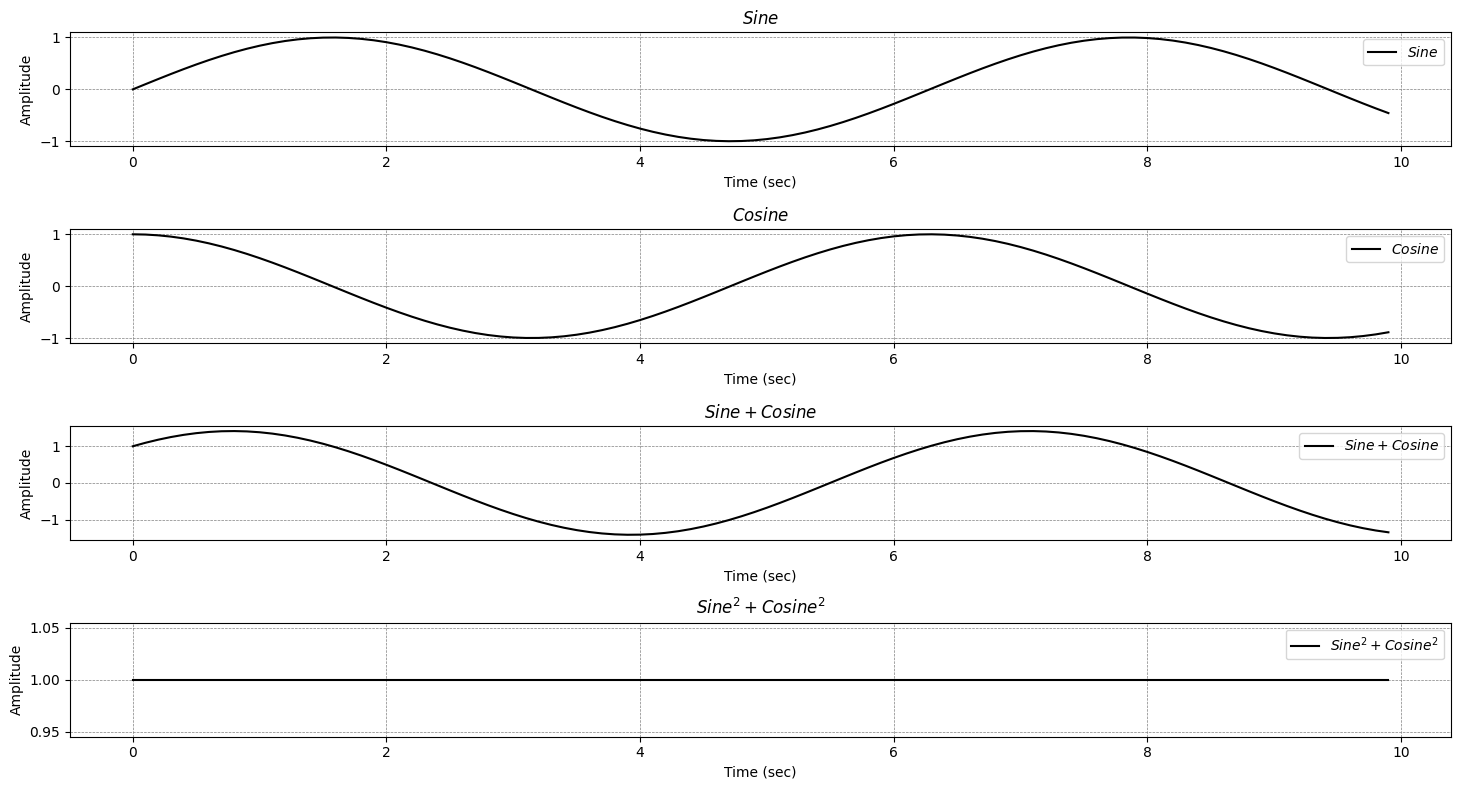

In [18]:
ms.plot(y1, y2, y_sum, y_square_sum)

Incase you want to plot multiple signals on the same plot, you can use the `loc` parameter.

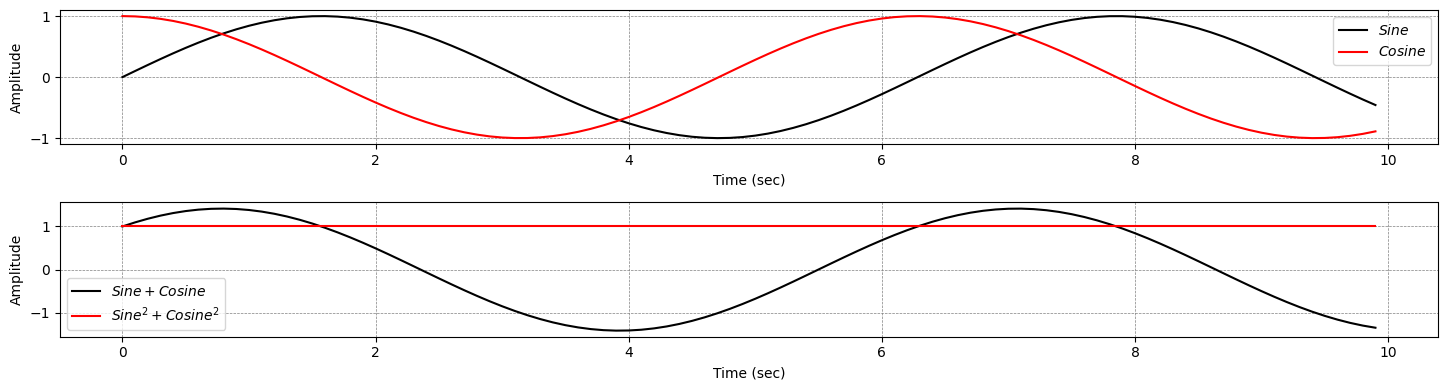

In [19]:
ms.plot(y1, y2, y_sum, y_square_sum, loc=(0, 0, 1, 1))

### How to work with 2D Signal
We have the following classes for 2D Signals.
- `S2D`: General purpose 2D signal
- `FTDS`: Feature Time Domain Signal

To create an object of these classes we have Generator APIs.

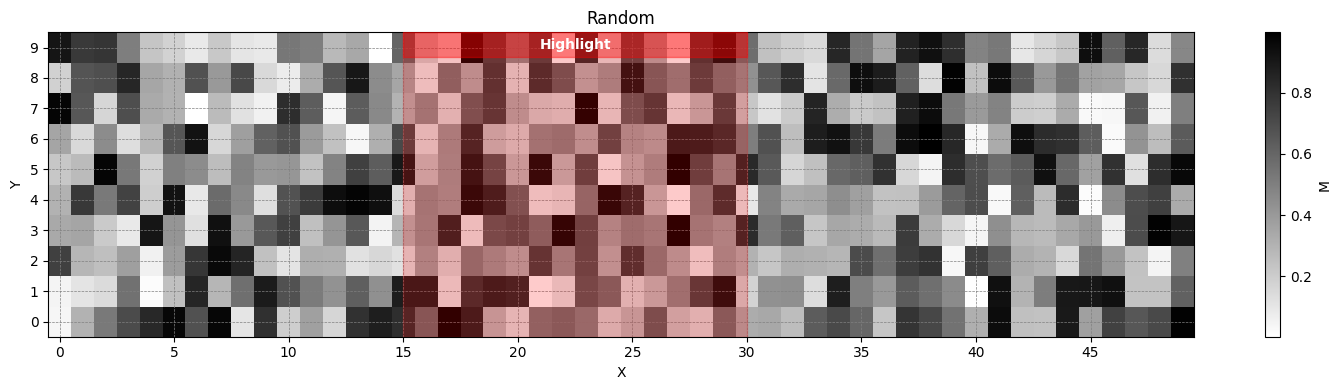

In [25]:
# Creating a 2D signal
M = ms.s2d.random((10, 50))
display(M.plot(highlight_regions=[(15, 30, "Highlight")]))

As mentioned above, you can try applying operations on the `S2D` objects. It should always return another `S2D` object.

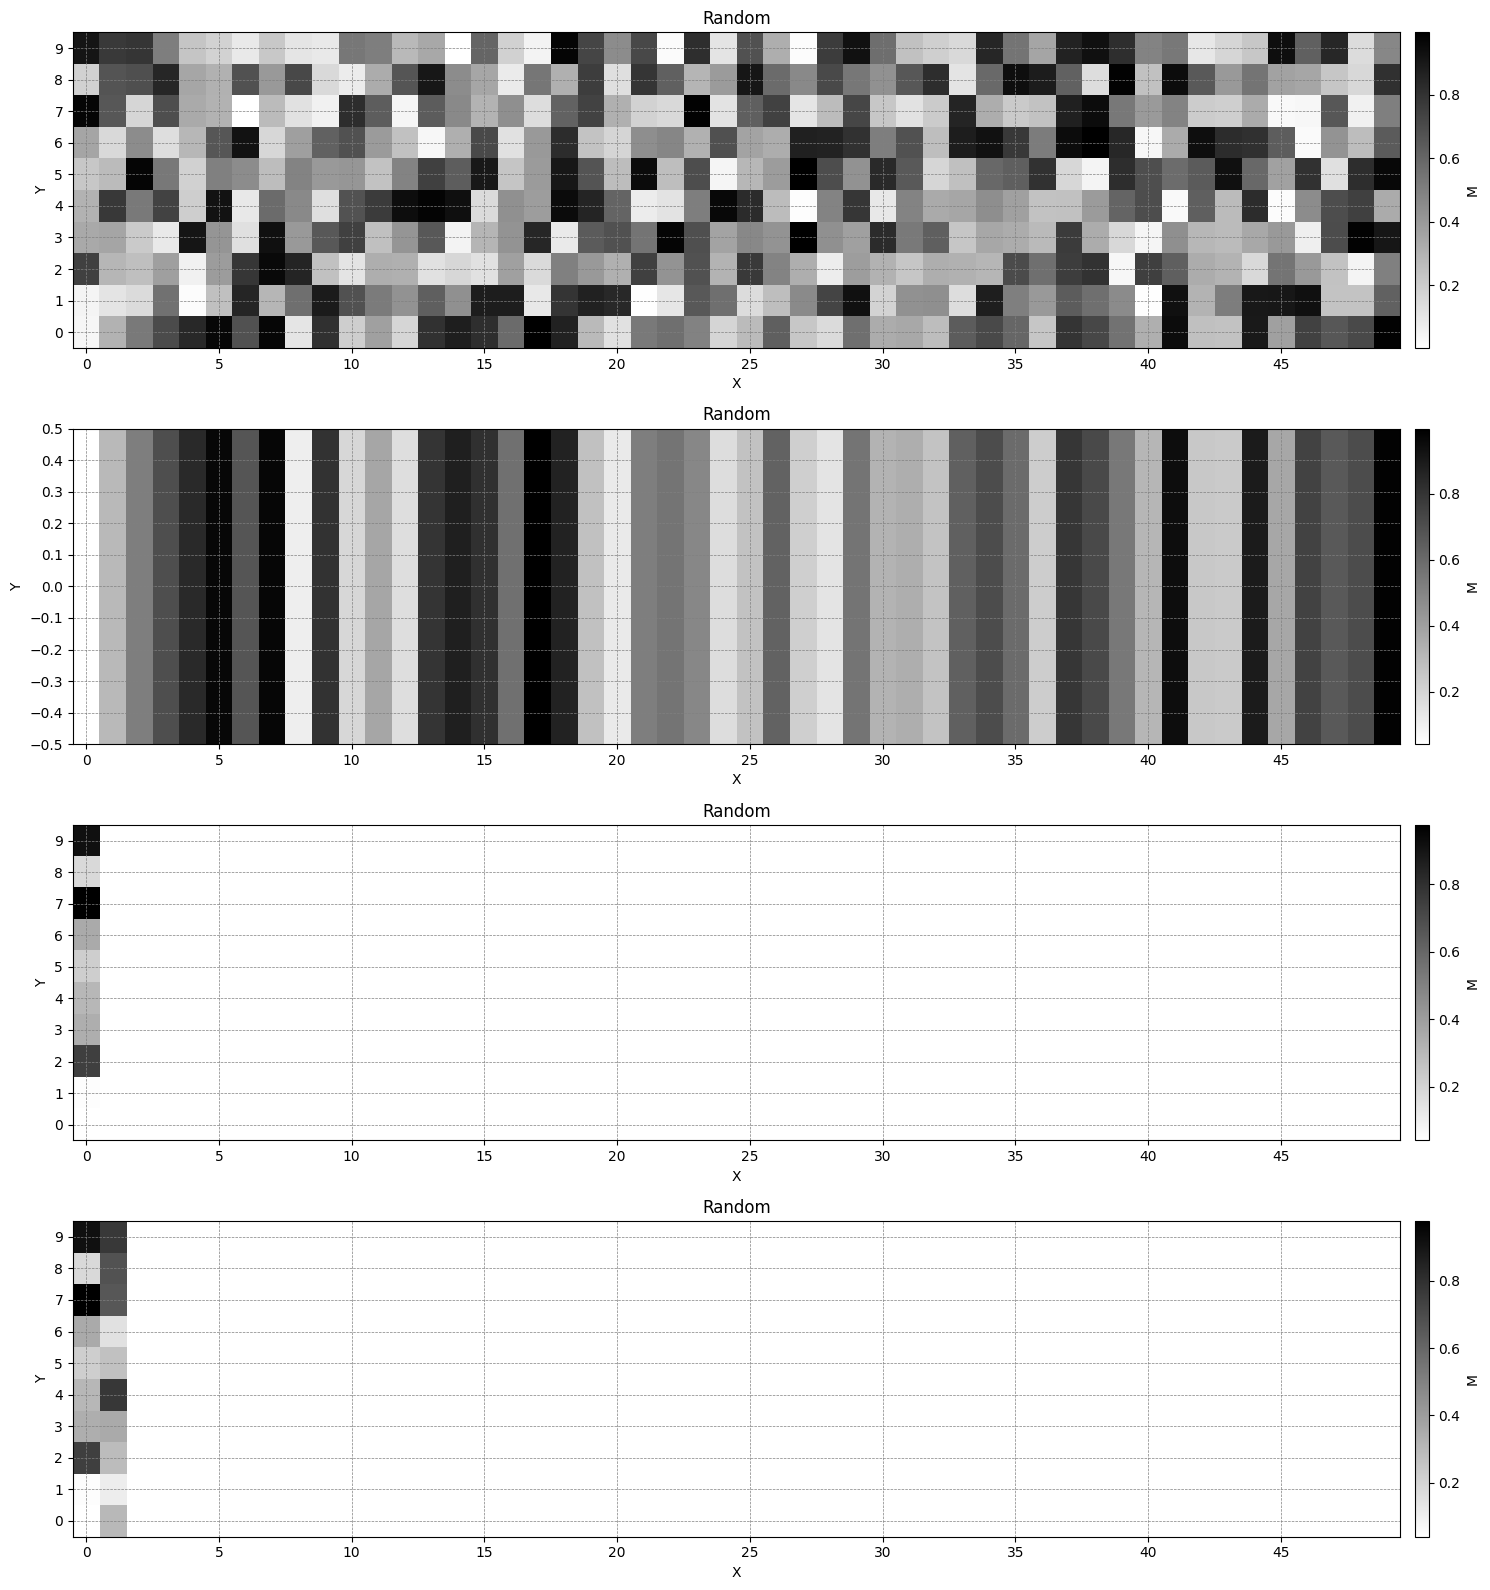

In [32]:
ms.plot(M, M[0], M[:,0], M[:,0:2])